# Breast Cancer Classification Problem Analysis

In [130]:
# Current R version
R.Version()$version.string

[1] "R version 4.3.2 (2023-10-31 ucrt)"

### Load Packages

In [198]:
#  install “package” if it doesn’t exist, and then load it.

if (!require(tidyverse)) install.packages('tidyverse')   # data manipulation
suppressWarnings(library(tidyverse))

if (!require(ggplot2)) install.packages('ggplot2')
suppressWarnings(library(ggplot2))

if (!require(GGally)) install.packages('GGally')
suppressWarnings(library("GGally"))


if (!require(randomForest)) install.packages('randomForest')
suppressWarnings(library(randomForest))

if (!require(e1071)) install.packages('e1071')
suppressWarnings(library(e1071))

if (!require(ROCR)) install.packages('ROCR')
suppressWarnings(library(ROCR))

if (!require(pROC)) install.packages('pROC')
suppressWarnings(library(pROC))

if (!require(RCurl)) install.packages('RCurl')
suppressWarnings(library(RCurl))

In [199]:
# Importing the dataset from
# https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

url = "breast cancer data.csv"
breast_cancer <- read.csv(url,header=TRUE, sep=",", as.is=TRUE)

In [200]:
head(breast_cancer)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


#### *Diagnosis (M = malignant, B = benign)

In [201]:
# Remove first and last column
df <- breast_cancer %>% 
    select(-c(id,X)) 
head(df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [202]:
df %>% 
  str()

'data.frame':	569 obs. of  31 variables:
 $ diagnosis              : chr  "M" "M" "M" "M" ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.787 1.156 0.781 ...
 $ perimeter_se           : num  8.59 3.4 4.58 3.44 5.44 ...
 $ area_se                : num  153.4 74

In [203]:
df %>% 
  summary()

  diagnosis          radius_mean      texture_mean   perimeter_mean  
 Length:569         Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 Class :character   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
 Mode  :character   Median :13.370   Median :18.84   Median : 86.24  
                    Mean   :14.127   Mean   :19.29   Mean   : 91.97  
                    3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
                    Max.   :28.110   Max.   :39.28   Max.   :188.50  
   area_mean      smoothness_mean   compactness_mean  concavity_mean   
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0   Max.   :0.16340   Max.   :0.34540   Max.   :0.42680  
 conca

In [204]:
# list any column has NA
df %>%
    keep(~anyNA(.x)) %>% 
    map_dbl(~sum(is.na(.x)))

named numeric(0)

In [205]:
# check class Imbalance
df %>% 
  count(diagnosis) %>%
  group_by(diagnosis) %>%
  summarize(perc_dx = round((n / 569)* 100, 2))  

diagnosis,perc_dx
<chr>,<dbl>
B,62.74
M,37.26


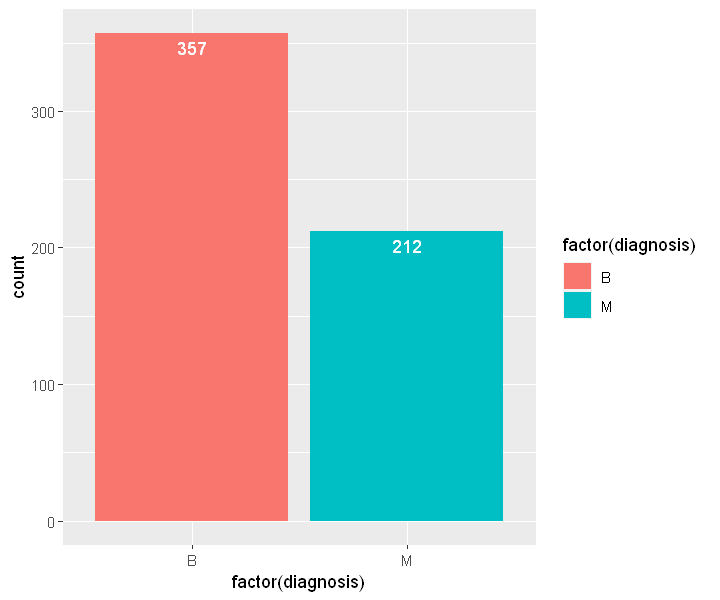

In [206]:
options(repr.plot.width = 6, repr.plot.height = 5)

ggplot(df, aes(factor(diagnosis),
        fill = factor(diagnosis))) +
    geom_bar() +   
    geom_text(aes(label = ..count..), stat = "count", vjust = 1.5, colour = "white")


#### Random Forest Algorithm does not sentitve to imbalance data 

### Feature importance

In [207]:
if (!require(caret)) install.packages('caret')
suppressWarnings(library(caret))

In [208]:
# https://www.r-bloggers.com/2017/01/feature-selection-in-machine-learning-breast-cancer-datasets/

if (!require(doParallel)) install.packages('doParallel')
suppressWarnings(library(doParallel)) # parallel processing
registerDoParallel()

In [209]:
# defining a function that estimates the feature importance and produces a plot.

# prepare training scheme
control <- trainControl(method = "repeatedcv", number = 10, repeats = 10)
feature_imp <- function(model, title) {
  
  # estimate variable importance
  importance <- varImp(model, scale = TRUE)
  
  # prepare dataframes for plotting
  importance_df_1 <- importance$importance
  importance_df_1$group <- rownames(importance_df_1)
  
  importance_df_2 <- importance_df_1
  importance_df_2$Overall <- 0
  
  importance_df <- rbind(importance_df_1, importance_df_2)
  
  plot <- ggplot() +
    geom_point(data = importance_df_1, aes(x = Overall, y = group, color = group), size = 2) +
    geom_path(data = importance_df, aes(x = Overall, y = group, color = group, group = group), size = 1) +
    theme(legend.position = "none") +
    labs(
      x = "Importance",
      y = "",
      title = title,
      subtitle = "Scaled feature importance",
      caption = "\nDetermined with Random Forest and
      repeated cross validation (10 repeats, 10 times)"
    )
  
  return(plot)
  
}

#### To get an idea about the feature’s respective importances, Using Random Forest models with 10 x 10 cross validation using the caret package.

In [210]:
set.seed(123)
fimp <- train(diagnosis ~ ., data = df, method = "rf", preProcess = c("scale", "center"), trControl = control)

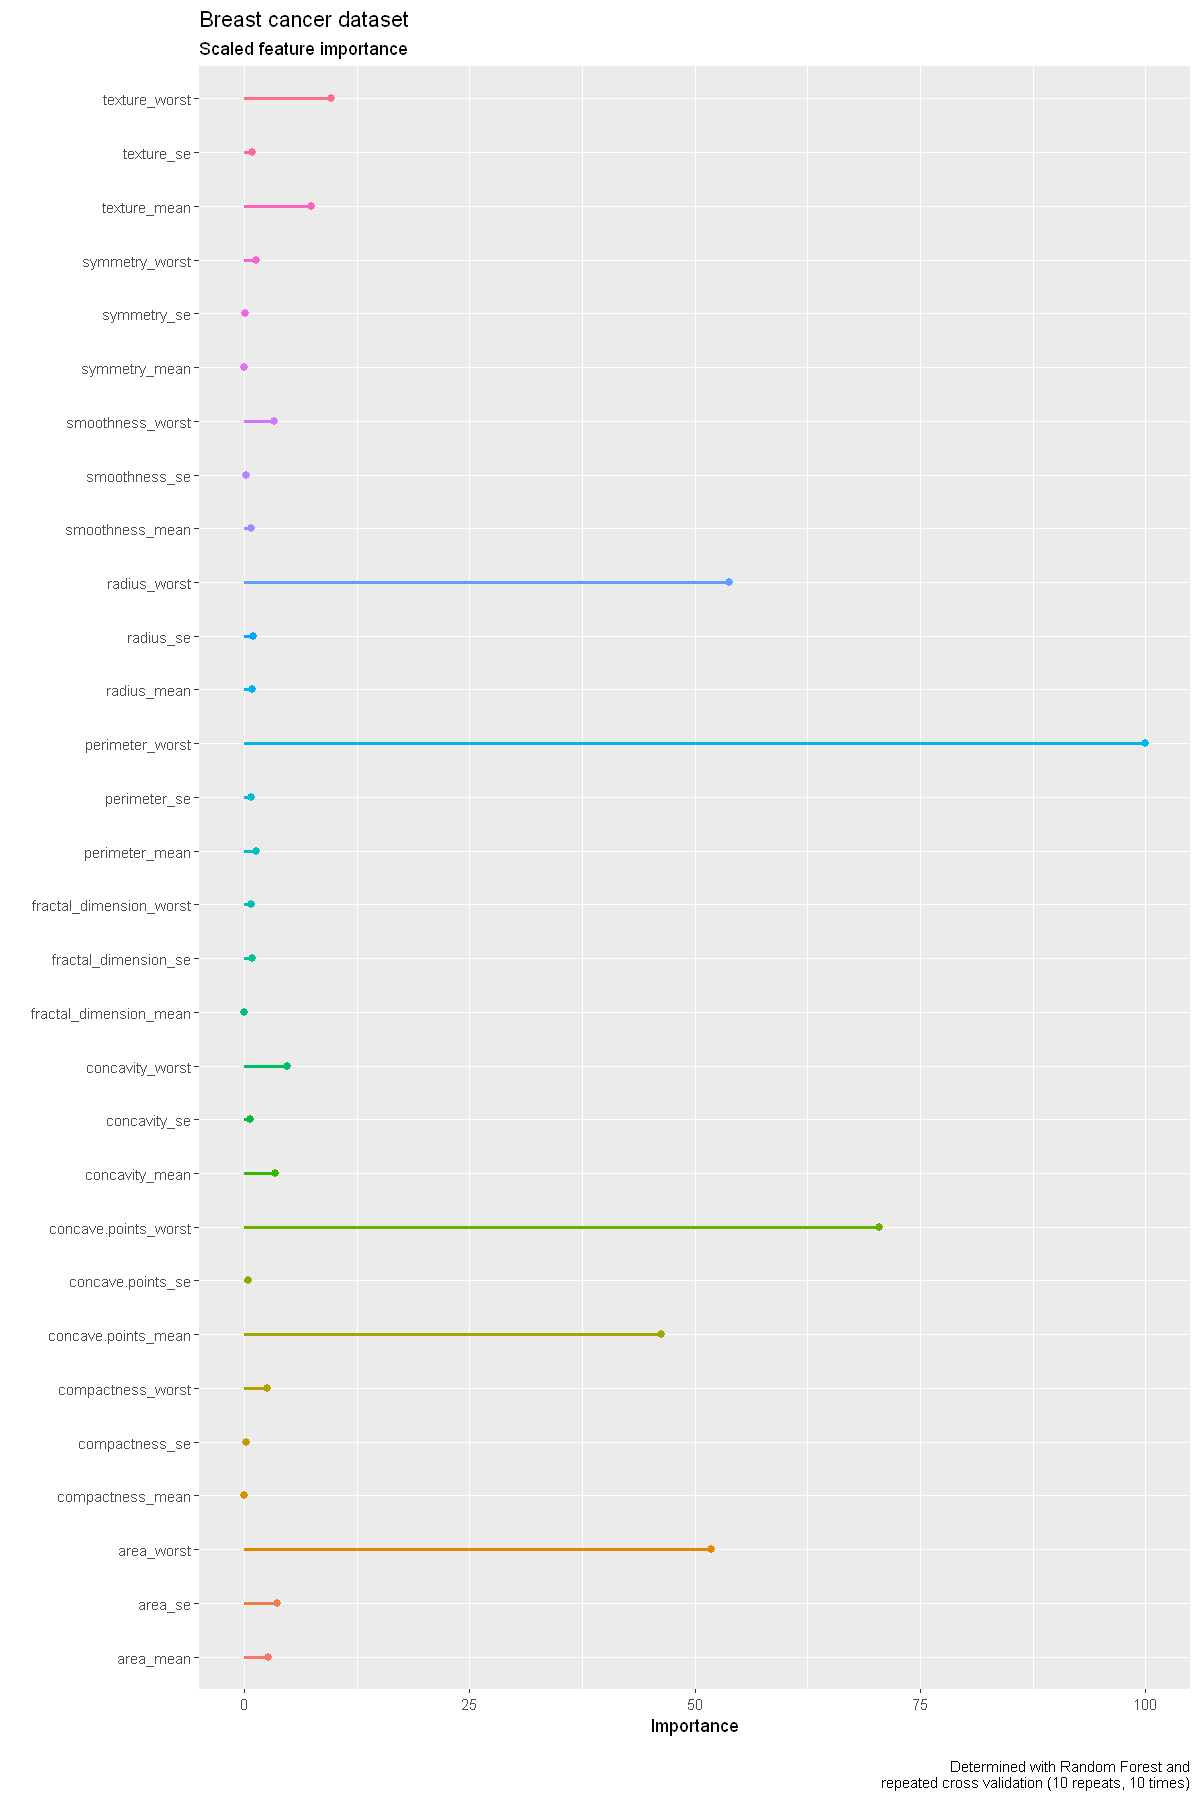

In [211]:
options(repr.plot.width = 10, repr.plot.height = 15)

feature_imp(fimp, title = "Breast cancer dataset")

### Feature Selection

#### Creating Training and Test Sets

In [212]:
# split the data set into our training and test sets which will be (pseudo) randomly selected having a 80-20% splt.
set.seed(321)
trainIndex <- createDataPartition(df$diagnosis, 
                                  p = .8, 
                                  list = FALSE, 
                                  times = 1)
training_set <- df[ trainIndex, ]
test_set <- df[ -trainIndex, ]

#### By Correlation

In [213]:
if (!require(corrplot)) install.packages('corrplot')
suppressWarnings(library(corrplot))

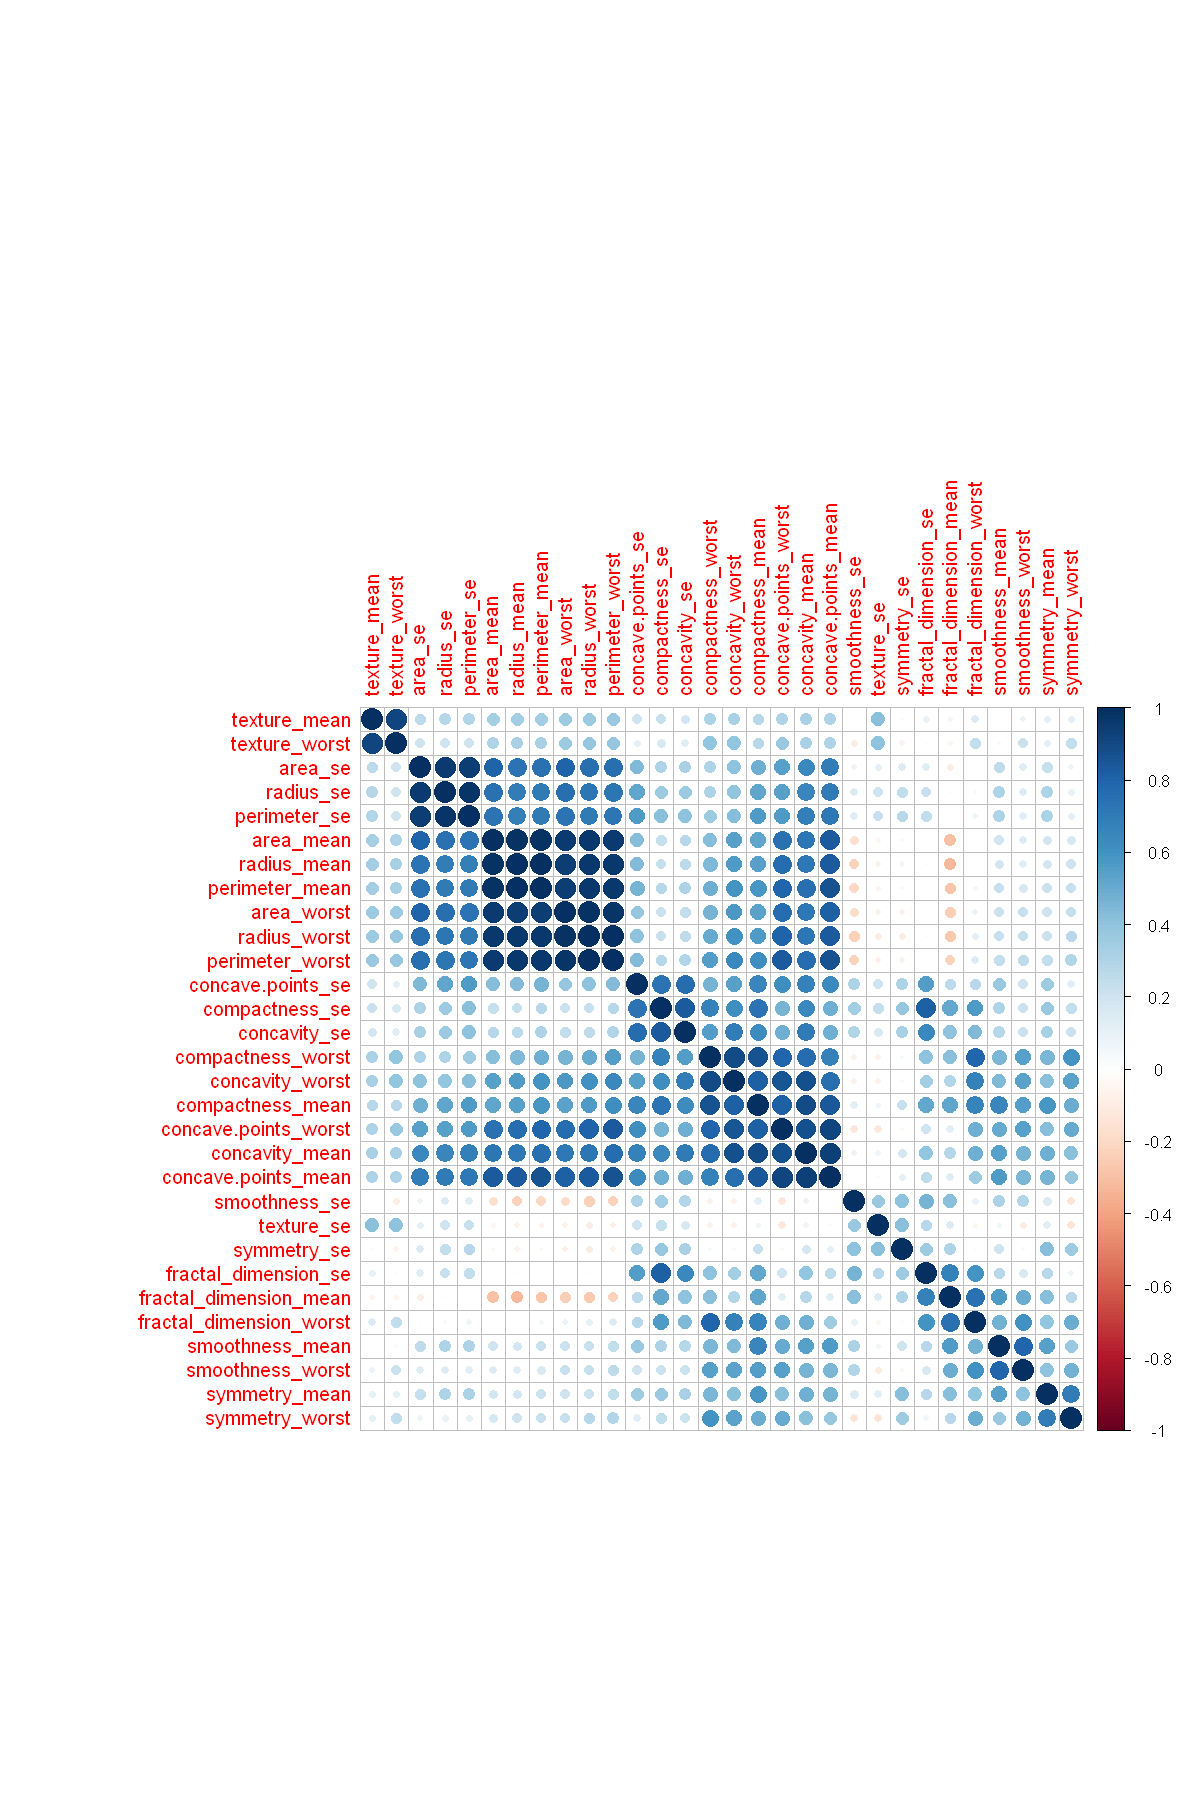

In [214]:
corMatMy <- cor(training_set[, -1])
corrplot(corMatMy, order = "hclust")

In [215]:
highlyCor <- colnames(training_set[, -1])[findCorrelation(corMatMy, cutoff = 0.7, verbose = TRUE)]

Compare row 7  and column  8 with corr  0.937 
  Means:  0.579 vs 0.395 so flagging column 7 
Compare row 8  and column  6 with corr  0.843 
  Means:  0.547 vs 0.382 so flagging column 8 
Compare row 6  and column  28 with corr  0.819 
  Means:  0.533 vs 0.37 so flagging column 6 
Compare row 28  and column  27 with corr  0.859 
  Means:  0.514 vs 0.359 so flagging column 28 
Compare row 27  and column  26 with corr  0.896 
  Means:  0.467 vs 0.348 so flagging column 27 
Compare row 23  and column  21 with corr  0.994 
  Means:  0.467 vs 0.338 so flagging column 23 
Compare row 21  and column  3 with corr  0.969 
  Means:  0.433 vs 0.327 so flagging column 21 
Compare row 3  and column  24 with corr  0.94 
  Means:  0.399 vs 0.319 so flagging column 3 
Compare row 26  and column  30 with corr  0.799 
  Means:  0.408 vs 0.316 so flagging column 26 
Compare row 24  and column  1 with corr  0.94 
  Means:  0.367 vs 0.303 so flagging column 24 
Compare row 1  and column  4 with corr  0.987

In [216]:
highlyCor

[1] "concavity_mean"          "concave.points_mean"    
 [3] "compactness_mean"        "concave.points_worst"   
 [5] "concavity_worst"         "perimeter_worst"        
 [7] "radius_worst"            "perimeter_mean"         
 [9] "compactness_worst"       "area_worst"             
[11] "radius_mean"             "perimeter_se"           
[13] "radius_se"               "concave.points_se"      
[15] "area_se"                 "compactness_se"         
[17] "smoothness_mean"         "fractal_dimension_worst"
[19] "texture_mean"

In [217]:
training_set_cor <- training_set[, which(!colnames(training_set) %in% highlyCor)]

#### By Recursive Feature Elimination (RFE)

In [218]:
set.seed(7)
# define the control using a random forest selection function with cross validation
control <- rfeControl(functions = rfFuncs, method = "cv", number = 10)

rfe_results <- rfe(x = training_set[,-1], y = as.factor(training_set$diagnosis), sizes = c(1:33), rfeControl = control)
predictors(rfe_results)

[1] "area_worst"              "radius_worst"           
 [3] "perimeter_worst"         "concave.points_worst"   
 [5] "concavity_worst"         "concave.points_mean"    
 [7] "area_mean"               "texture_worst"          
 [9] "area_se"                 "smoothness_worst"       
[11] "radius_mean"             "concavity_mean"         
[13] "perimeter_mean"          "compactness_worst"      
[15] "texture_mean"            "symmetry_worst"         
[17] "radius_se"               "perimeter_se"           
[19] "compactness_mean"        "smoothness_mean"        
[21] "fractal_dimension_worst" "concavity_se"           
[23] "fractal_dimension_mean"  "compactness_se"         
[25] "concave.points_se"       "fractal_dimension_se"   
[27] "texture_se"              "symmetry_mean"          
[29] "smoothness_se"           "symmetry_se"

In [219]:
training_set_rfe <- training_set[, c(1, which(colnames(training_set) %in% predictors(rfe_results)))]

#### By Genetic Algorithm (GA)

In [220]:
ga_ctrl <- gafsControl(functions = rfGA, # Assess fitness with RF
                       method = "cv",    # 10 fold cross validation
                       genParallel = TRUE, # Use parallel programming
                       allowParallel = TRUE)

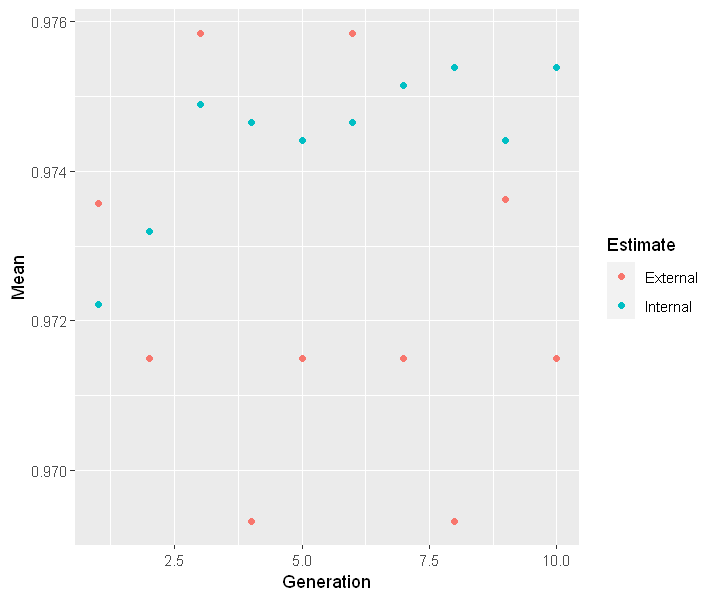

In [221]:
## Use the same random number seed as the RFE process
## so that the same CV folds are used for the external
## resampling. 

set.seed(27)
lev <- c("M", "B") # Set the levels

rf_ga <- gafs(x = training_set[,-1], y = as.factor(training_set$diagnosis),
                 iters = 10, # generations of algorithm
                 popSize = 5, # population size for each generation
                 levels = lev,
                 gafsControl = ga_ctrl)

options(repr.plot.width = 6, repr.plot.height = 5)

plot(rf_ga) # Plot mean fitness (AUC) by generation

In [222]:
rf_ga$ga$final

[1] "radius_mean"             "texture_mean"           
 [3] "compactness_mean"        "concave.points_mean"    
 [5] "symmetry_mean"           "fractal_dimension_mean" 
 [7] "radius_se"               "texture_se"             
 [9] "perimeter_se"            "compactness_se"         
[11] "concavity_se"            "concave.points_se"      
[13] "fractal_dimension_se"    "texture_worst"          
[15] "perimeter_worst"         "area_worst"             
[17] "smoothness_worst"        "compactness_worst"      
[19] "concavity_worst"         "concave.points_worst"   
[21] "fractal_dimension_worst"

In [223]:
training_set_ga <- training_set[, c(1, which(colnames(training_set) %in% rf_ga$ga$final))]

### Model comparison

#### 1 - All features

In [224]:
set.seed(27)
model_all <- train(diagnosis ~ .,
               data = training_set,
               method = "rf",
               preProcess = c("scale", "center"),
               trControl = trainControl(method = "repeatedcv", number = 5, repeats = 10, verboseIter = FALSE))

In [225]:
cm_all <- confusionMatrix(predict(model_all, test_set), as.factor(test_set$diagnosis))
cm_all

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 65  6
         M  6 36
                                          
               Accuracy : 0.8938          
                 95% CI : (0.8218, 0.9439)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : 1.762e-10       
                                          
                  Kappa : 0.7726          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9155          
            Specificity : 0.8571          
         Pos Pred Value : 0.9155          
         Neg Pred Value : 0.8571          
             Prevalence : 0.6283          
         Detection Rate : 0.5752          
   Detection Prevalence : 0.6283          
      Balanced Accuracy : 0.8863          
                                          
       'Positive' Class : B               
                                    

Setting levels: control = B, case = M

Setting direction: controls < cases



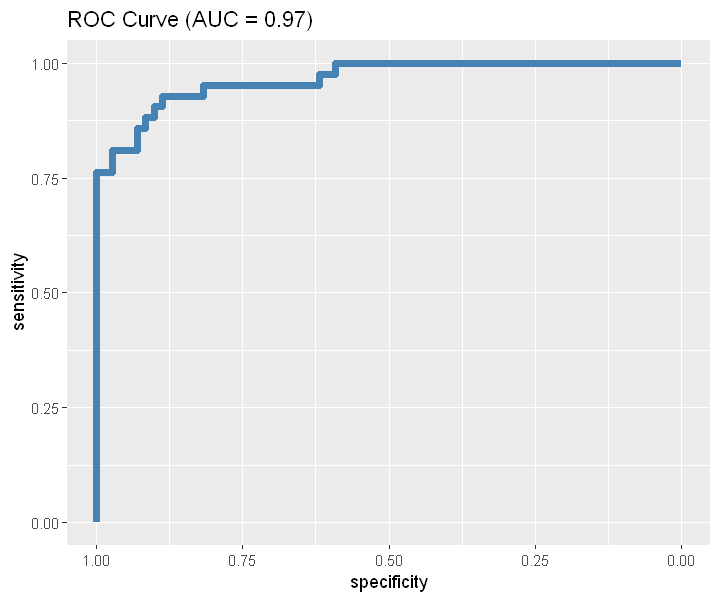

In [226]:
# Compute predicted probabilities
all_pred_prob = predict(object = model_all,
                newdata = test_set,
                type = "prob")

#ROC-curve using pROC library

all_ROC <- roc(test_set$diagnosis, all_pred_prob[,"M"] )

#all_auc <- paste("AUC=",round(auc(all_ROC), digits=2), sep='')

ggroc(all_ROC, colour = 'steelblue', size = 2) + 
    #annotate(geom="text", x=0.8, y=0.85, label=all_auc)
    ggtitle(paste0('ROC Curve ', '(AUC = ', round(auc(all_ROC), digits=2), ')'))  # https://www.statology.org/roc-curve-ggplot2/

#### 2 - Correlation

In [227]:
set.seed(27)
model_cor <- train(diagnosis ~ .,
                           data = training_set_cor,
                           method = "rf",
                           preProcess = c("scale", "center"),
                           trControl = trainControl(method = "repeatedcv", number = 5, repeats = 10, verboseIter = FALSE))

In [228]:
cm_cor <- confusionMatrix(predict(model_cor, test_set), as.factor(test_set$diagnosis))
cm_cor

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 69  8
         M  2 34
                                          
               Accuracy : 0.9115          
                 95% CI : (0.8433, 0.9567)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : 6.062e-12       
                                          
                  Kappa : 0.8048          
                                          
 Mcnemar's Test P-Value : 0.1138          
                                          
            Sensitivity : 0.9718          
            Specificity : 0.8095          
         Pos Pred Value : 0.8961          
         Neg Pred Value : 0.9444          
             Prevalence : 0.6283          
         Detection Rate : 0.6106          
   Detection Prevalence : 0.6814          
      Balanced Accuracy : 0.8907          
                                          
       'Positive' Class : B               
                                    

Setting levels: control = B, case = M

Setting direction: controls < cases



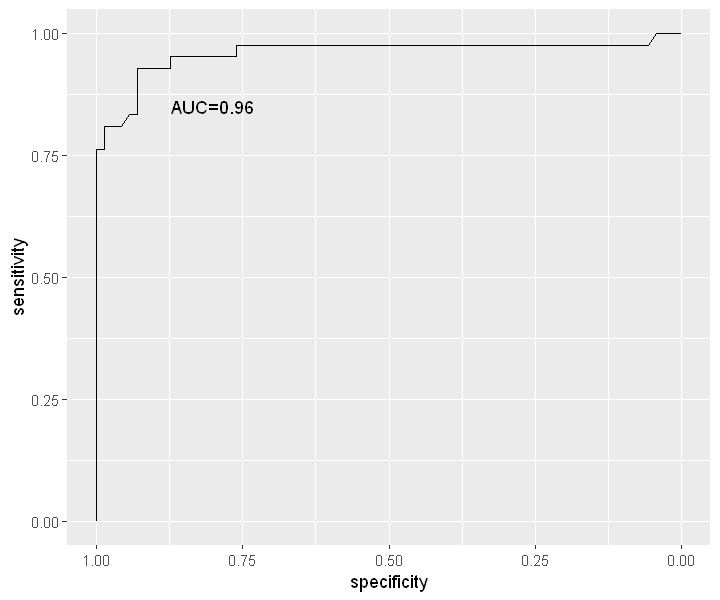

In [229]:
# Compute predicted probabilities
cor_pred_prob = predict(object = model_cor,
                newdata = test_set,
                type = "prob")

#ROC-curve using pROC library

cor_ROC <- roc(test_set$diagnosis, cor_pred_prob[,"M"] )

myauc <- paste("AUC=",round(auc(cor_ROC), digits=2), sep='')
ggroc(cor_ROC) + annotate(geom="text", x=0.8, y=0.85, label=myauc)

#### 3 - RFE

In [230]:
set.seed(27)
model_rfe <- train(diagnosis ~ .,
                           data = training_set_rfe,
                           method = "rf",
                           preProcess = c("scale", "center"),
                           trControl = trainControl(method = "repeatedcv", number = 5, repeats = 10, verboseIter = FALSE))

In [231]:
cm_rfe <- confusionMatrix(predict(model_rfe, test_set), as.factor(test_set$diagnosis))
cm_rfe

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 65  6
         M  6 36
                                          
               Accuracy : 0.8938          
                 95% CI : (0.8218, 0.9439)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : 1.762e-10       
                                          
                  Kappa : 0.7726          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9155          
            Specificity : 0.8571          
         Pos Pred Value : 0.9155          
         Neg Pred Value : 0.8571          
             Prevalence : 0.6283          
         Detection Rate : 0.5752          
   Detection Prevalence : 0.6283          
      Balanced Accuracy : 0.8863          
                                          
       'Positive' Class : B               
                                    

Setting levels: control = B, case = M

Setting direction: controls < cases



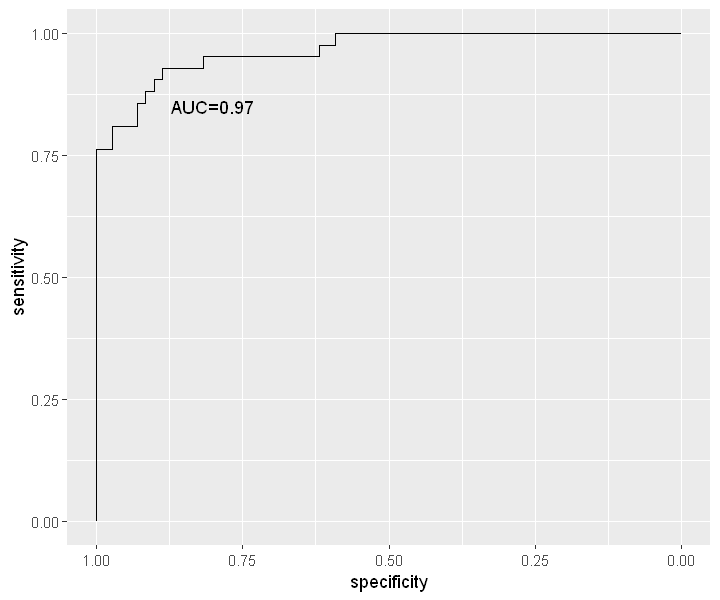

In [232]:
# Compute predicted probabilities
rf_pred_prob = predict(object = model_rfe,
                newdata = test_set,
                type = "prob")

#ROC-curve using pROC library

rf_ROC <- roc(test_set$diagnosis, rf_pred_prob[,"M"] )

#https://bookdown.org/m_villa43/rlabnotes_mlfe2022/trees.html
myauc <- paste("AUC=",round(auc(rf_ROC), digits=2), sep='')
ggroc(rf_ROC) + annotate(geom="text", x=0.8, y=0.85, label=myauc)

Setting levels: control = B, case = M

Setting direction: controls < cases




Call:
roc.default(response = test_set$diagnosis, predictor = rf_pred_prob[,     "M"], plot = TRUE, legacy.axes = TRUE, precent = TRUE, xlab = "False Positive rate (100-Specificity)",     ylab = "True Positive rate (Sensitivity)")

Data: rf_pred_prob[, "M"] in 71 controls (test_set$diagnosis B) < 42 cases (test_set$diagnosis M).
Area under the curve: 0.9651

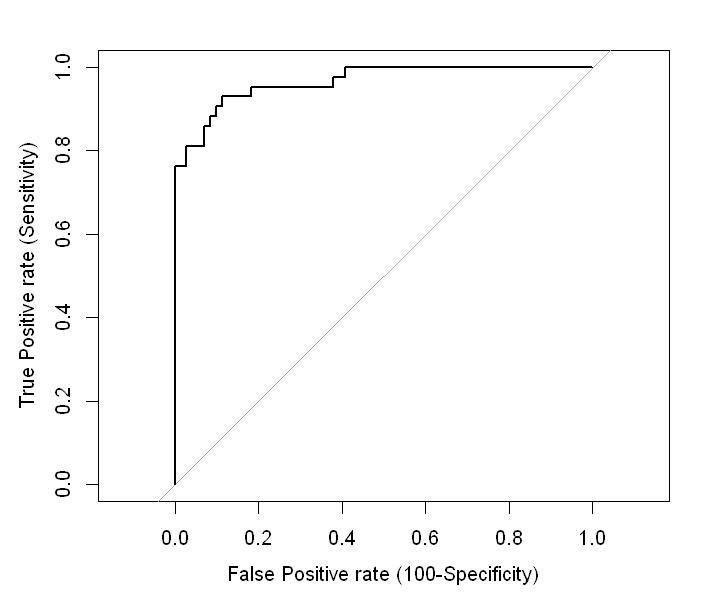

In [233]:
# https://www.youtube.com/watch?v=zk017BiA-ZE

roc(test_set$diagnosis, 
    rf_pred_prob[,"M"], 
    plot=TRUE, 
    legacy.axes=TRUE, 
    precent=TRUE, 
    xlab="False Positive rate (100-Specificity)", 
    ylab="True Positive rate (Sensitivity)")

#### 4 - GA

In [234]:
set.seed(27)
model_ga <- train(diagnosis ~ .,
                          data = training_set_ga,
                          method = "rf",
                          preProcess = c("scale", "center"),
                          trControl = trainControl(method = "repeatedcv", number = 5, repeats = 10, verboseIter = FALSE))

In [235]:
cm_ga <- confusionMatrix(predict(model_ga, test_set), as.factor(test_set$diagnosis))
cm_ga

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 66  5
         M  5 37
                                          
               Accuracy : 0.9115          
                 95% CI : (0.8433, 0.9567)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : 6.062e-12       
                                          
                  Kappa : 0.8105          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9296          
            Specificity : 0.8810          
         Pos Pred Value : 0.9296          
         Neg Pred Value : 0.8810          
             Prevalence : 0.6283          
         Detection Rate : 0.5841          
   Detection Prevalence : 0.6283          
      Balanced Accuracy : 0.9053          
                                          
       'Positive' Class : B               
                                    

Setting levels: control = B, case = M

Setting direction: controls < cases



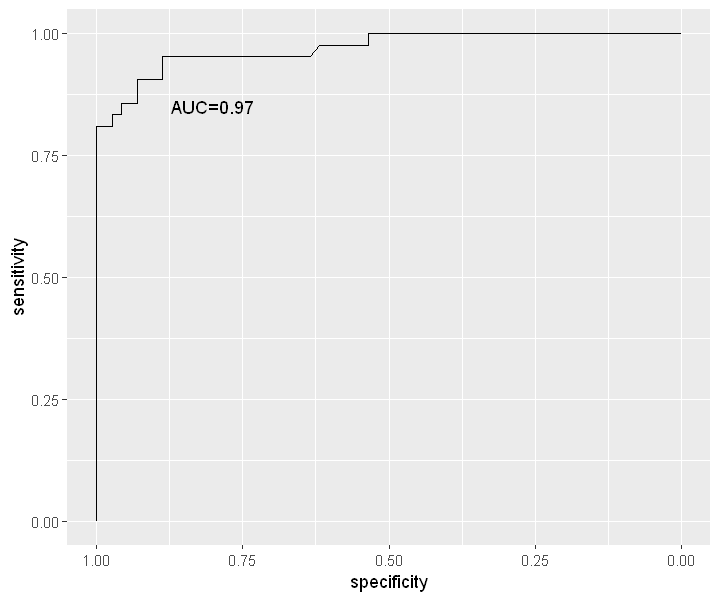

In [236]:
# Compute predicted probabilities
ga_pred_prob = predict(object = model_ga,
                newdata = test_set,
                type = "prob")

#ROC-curve using pROC library

ga_ROC <- roc(test_set$diagnosis, ga_pred_prob[,"M"] )

#https://bookdown.org/m_villa43/rlabnotes_mlfe2022/trees.html
myauc <- paste("AUC=",round(auc(ga_ROC), digits=2), sep='')
ggroc(ga_ROC) + annotate(geom="text", x=0.8, y=0.85, label=myauc)

In [237]:
overall <- data.frame(model =c("all", "cor", "rfe", "ga"),
                      rbind(cm_all$overall,
                      cm_cor$overall,
                      cm_rfe$overall,
                      cm_ga$overall ))

In [238]:
overall

model,Accuracy,Kappa,AccuracyLower,AccuracyUpper,AccuracyNull,AccuracyPValue,McnemarPValue
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
all,0.8938053,0.7726358,0.8218458,0.9439107,0.6283186,1.762272e-10,1.0000000
cor,0.9115044,0.8048359,0.8432715,0.9567440,0.6283186,6.061828e-12,0.1138463
rfe,0.8938053,0.7726358,0.8218458,0.9439107,0.6283186,1.762272e-10,1.0000000
ga,0.9115044,0.8105298,0.8432715,0.9567440,0.6283186,6.061828e-12,1.0000000


In [239]:
overall_gather <- overall[, 1:3] %>%
  gather(measure, value, Accuracy:Kappa)

In [240]:
overall_gather

model,measure,value
<chr>,<chr>,<dbl>
all,Accuracy,0.8938053
cor,Accuracy,0.9115044
rfe,Accuracy,0.8938053
ga,Accuracy,0.9115044
all,Kappa,0.7726358
cor,Kappa,0.8048359
rfe,Kappa,0.7726358
ga,Kappa,0.8105298


In [241]:
byClass <- data.frame(model = c("all", "cor", "rfe", "ga"),
                      rbind(cm_all$byClass,
                      cm_cor$byClass,
                      cm_rfe$byClass,
                      cm_ga$byClass ))

In [242]:
byClass

model,Sensitivity,Specificity,Pos.Pred.Value,Neg.Pred.Value,Precision,Recall,F1,Prevalence,Detection.Rate,Detection.Prevalence,Balanced.Accuracy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
all,0.9154930,0.8571429,0.9154930,0.8571429,0.9154930,0.9154930,0.9154930,0.6283186,0.5752212,0.6283186,0.8863179
cor,0.9718310,0.8095238,0.8961039,0.9444444,0.8961039,0.9718310,0.9324324,0.6283186,0.6106195,0.6814159,0.8906774
rfe,0.9154930,0.8571429,0.9154930,0.8571429,0.9154930,0.9154930,0.9154930,0.6283186,0.5752212,0.6283186,0.8863179
ga,0.9295775,0.8809524,0.9295775,0.8809524,0.9295775,0.9295775,0.9295775,0.6283186,0.5840708,0.6283186,0.9052649


In [243]:
byClass_gather <- byClass[, c(1:3, 6:7)] %>%
  gather(measure, value, Sensitivity:Recall)

In [244]:
byClass_gather

model,measure,value
<chr>,<chr>,<dbl>
all,Sensitivity,0.9154930
cor,Sensitivity,0.9718310
rfe,Sensitivity,0.9154930
ga,Sensitivity,0.9295775
all,Specificity,0.8571429
cor,Specificity,0.8095238
rfe,Specificity,0.8571429
ga,Specificity,0.8809524
all,Precision,0.9154930


In [245]:
overall_byClass_gather <- rbind(overall_gather, byClass_gather)
overall_byClass_gather <- within(overall_byClass_gather, model <- factor(model, levels = c("all", "cor", "rfe", "ga")))

In [246]:
overall_byClass_gather

model,measure,value
<fct>,<chr>,<dbl>
all,Accuracy,0.8938053
cor,Accuracy,0.9115044
rfe,Accuracy,0.8938053
ga,Accuracy,0.9115044
all,Kappa,0.7726358
cor,Kappa,0.8048359
rfe,Kappa,0.7726358
ga,Kappa,0.8105298
all,Sensitivity,0.9154930


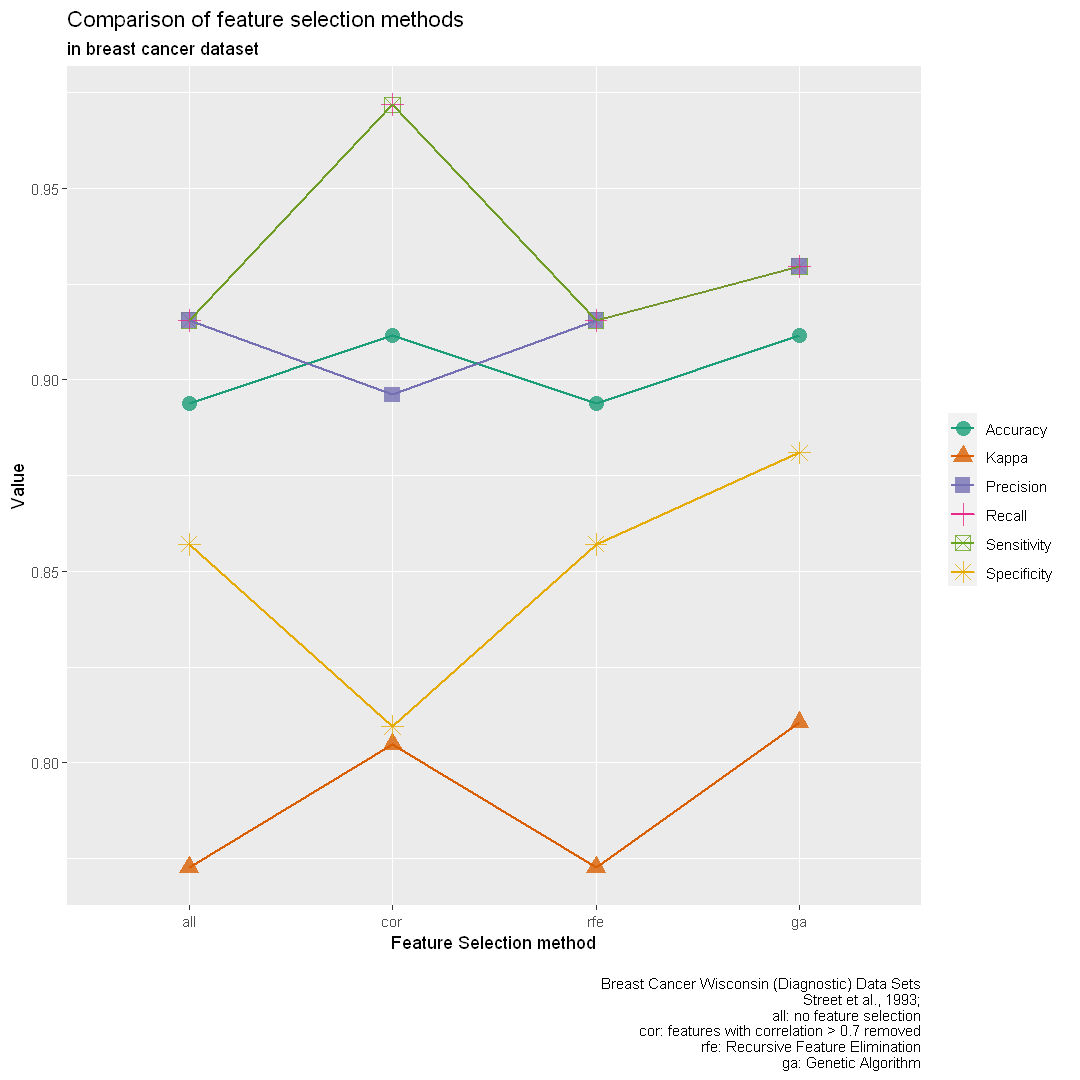

In [247]:
options(repr.plot.width = 9, repr.plot.height = 9)

ggplot(overall_byClass_gather, aes(x = model, y = value, color = measure, shape = measure, group = measure)) +
  geom_point(size = 4, alpha = 0.8) +
  geom_line(size=0.8) +
  geom_path(alpha = 0.7) +
  scale_colour_brewer(palette = "Dark2") +
  labs(
    x = "Feature Selection method",
    y = "Value",
    color = "",
    shape = "",
    title = "Comparison of feature selection methods",
    subtitle = "in breast cancer dataset",
    caption = "\nBreast Cancer Wisconsin (Diagnostic) Data Sets
    Street et al., 1993;
    all: no feature selection
    cor: features with correlation > 0.7 removed
    rfe: Recursive Feature Elimination
    ga: Genetic Algorithm"
  )

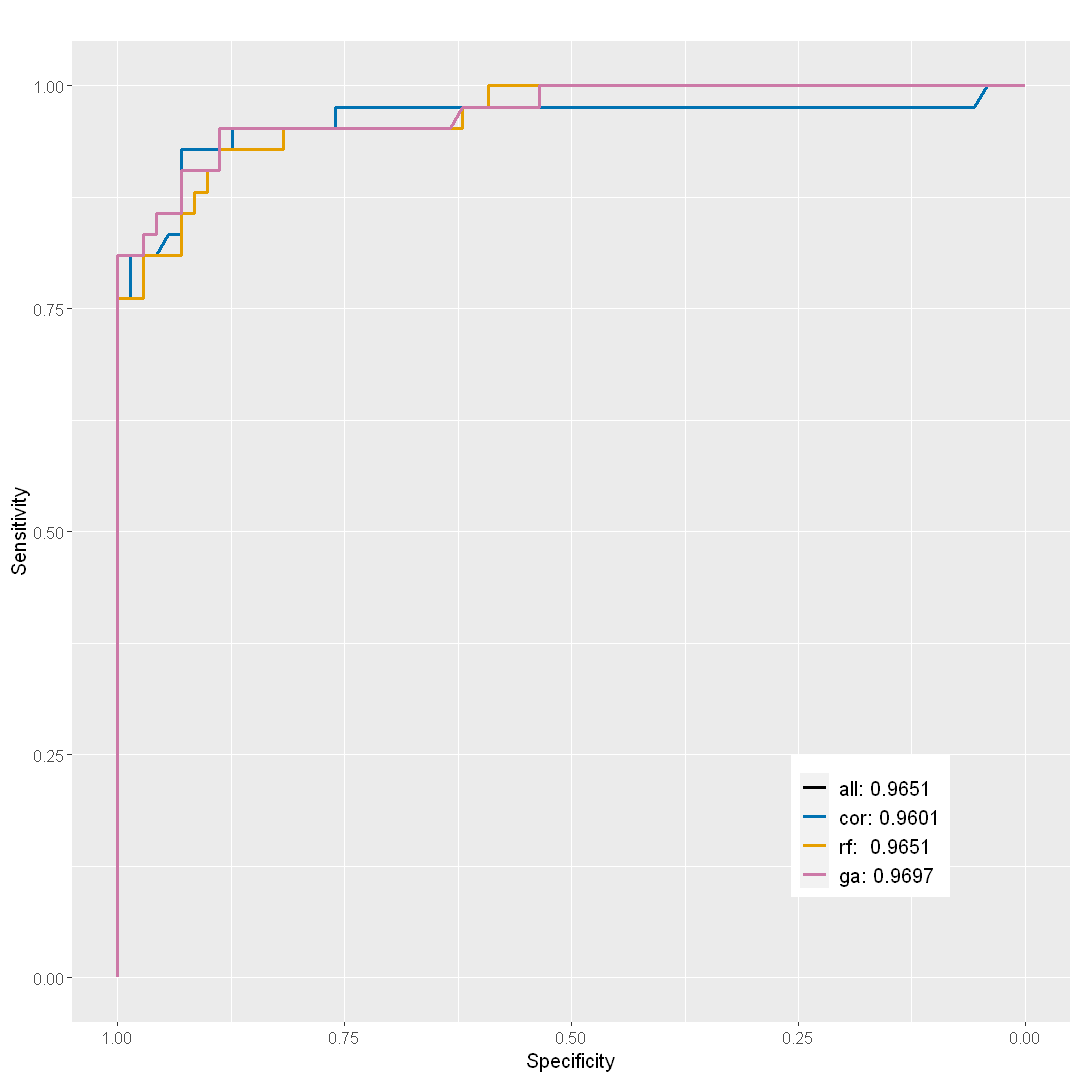

In [248]:
# https://felixfan.gitbooks.io/r-plots/content/roc-curve.html
# Multiple curves:

ggroc(list(all=all_ROC, cor=cor_ROC, rf=rf_ROC, ga=ga_ROC) , size = 1) + 
 
theme(legend.title = element_blank(), 
      legend.position = c(0.8, 0.2),
      legend.text = element_text(size=12),
      text = element_text(size=12)) + 
      scale_color_manual(values=c("#000000", "#0072B2", "#E69F00", "#CC79A7"), 
                       labels=c(paste("all: ", round(all_ROC$auc,4), sep=""), 
                                paste("cor: ", round(cor_ROC$auc, 4), sep=""), 
                                paste("rf: ", round(rf_ROC$auc, 4), spe=""),
                                paste("ga: ", round(ga_ROC$auc, 4), sep="")
                                )
                       ) +
    labs(title="", x="Specificity", y="Sensitivity")

### Conclusions

#### RFE and COR both improved the predictions compared to no feature selection, while RFE performed best. 

### Grid search

In [271]:
# https://rpubs.com/phamdinhkhanh/389752

In [270]:
control <- trainControl(method="repeatedcv", number=10, repeats=3)
seed <- 7
metric <- "Accuracy"
set.seed(seed)
tunegrid <- expand.grid(.mtry=c(1:15))
rf_default <- train(diagnosis~., data=training_set_rfe, method="rf", metric=metric, tuneGrid=tunegrid, trControl=control)
print(rf_default)

Random Forest 

456 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 410, 410, 410, 410, 410, 411, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.9692915  0.9337766
   2    0.9722222  0.9401926
   3    0.9715298  0.9382339
   4    0.9722544  0.9398420
   5    0.9708052  0.9369673
   6    0.9700805  0.9350796
   7    0.9686312  0.9320442
   8    0.9686473  0.9324523
   9    0.9686151  0.9321065
  10    0.9671659  0.9290702
  11    0.9678905  0.9304508
  12    0.9678905  0.9307245
  13    0.9678905  0.9306056
  14    0.9649758  0.9243218
  15    0.9657166  0.9259562

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.


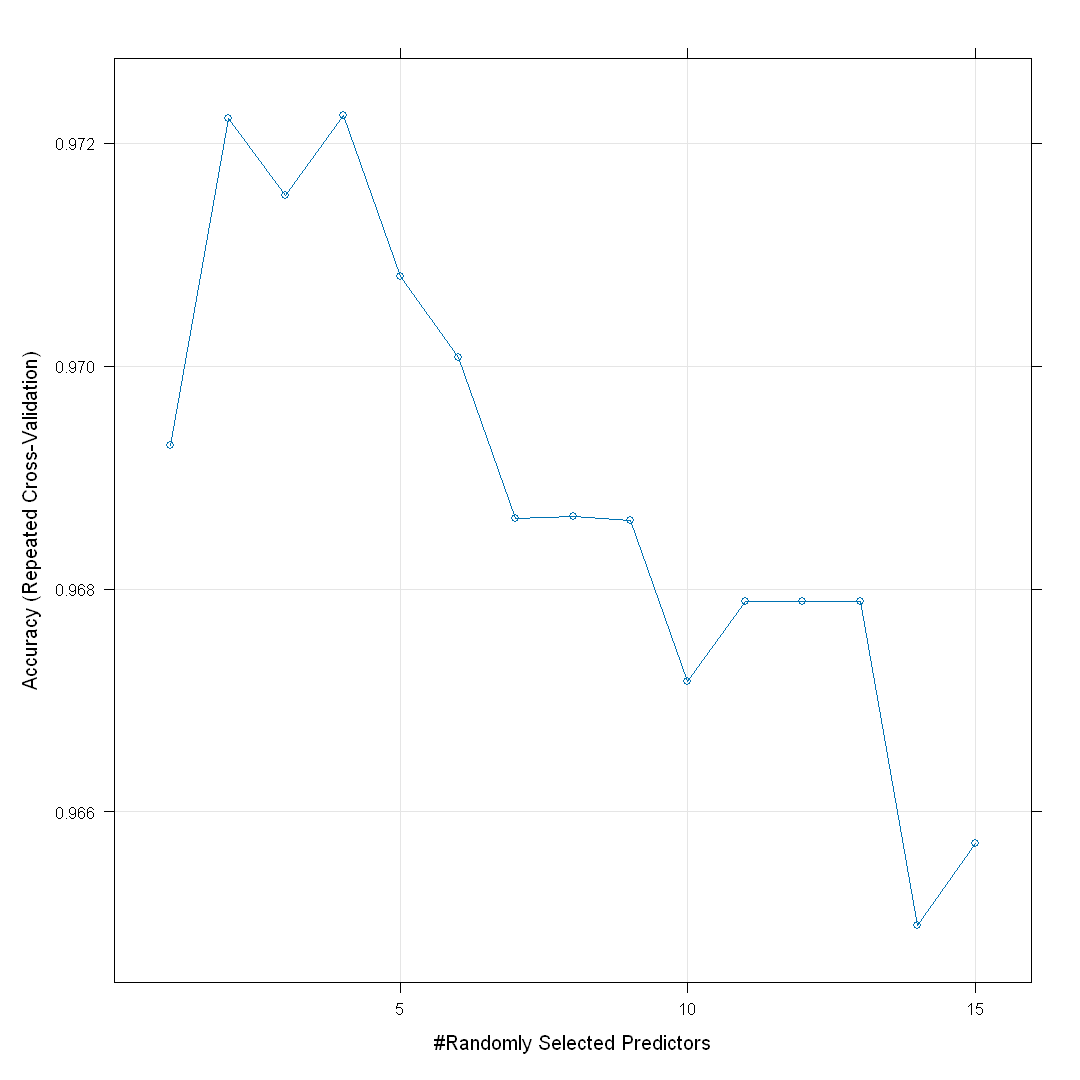

In [267]:
plot(rf_default)

#### this results recommend us that the best optimal mtry = 4 with accuracy = 97.22%.

In [268]:
#Manual search by create 10 folds and repeat 3 times
control <- trainControl(method = 'repeatedcv',
                        number = 10,
                        repeats = 3,
                        search = 'grid')
#create tunegrid
tunegrid <- expand.grid(.mtry = c(1:15))  # #create tunegrid with 15 values from 1:15 for mtry to tunning model.
modellist <- list()

#train with different ntree parameters
for (ntree in c(1000,1500,2000,2500)){
  set.seed(123)
  fit <- train(diagnosis~.,
               data = training_set_rfe,
               method = 'rf',
               metric = 'Accuracy',
               tuneGrid = tunegrid,
               trControl = control,
               ntree = ntree)
  key <- toString(ntree)
  modellist[[key]] <- fit
}

#Compare results
results <- resamples(modellist)
summary(results)


Call:
summary.resamples(object = results)

Models: 1000, 1500, 2000, 2500 
Number of resamples: 30 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
1000 0.9347826 0.9777778 0.9782609 0.9759420 0.9782609    1    0
1500 0.9347826 0.9777778 0.9782609 0.9759420 0.9782609    1    0
2000 0.9347826 0.9777778 0.9780193 0.9752013 0.9782609    1    0
2500 0.9347826 0.9777778 0.9782609 0.9752174 0.9782609    1    0

Kappa 
          Min.   1st Qu.    Median      Mean  3rd Qu. Max. NA's
1000 0.8547368 0.9521785 0.9527721 0.9479683 0.953271    1    0
1500 0.8547368 0.9521785 0.9527721 0.9479683 0.953271    1    0
2000 0.8547368 0.9521785 0.9527721 0.9463742 0.953271    1    0
2500 0.8547368 0.9521785 0.9527721 0.9464333 0.953271    1    0


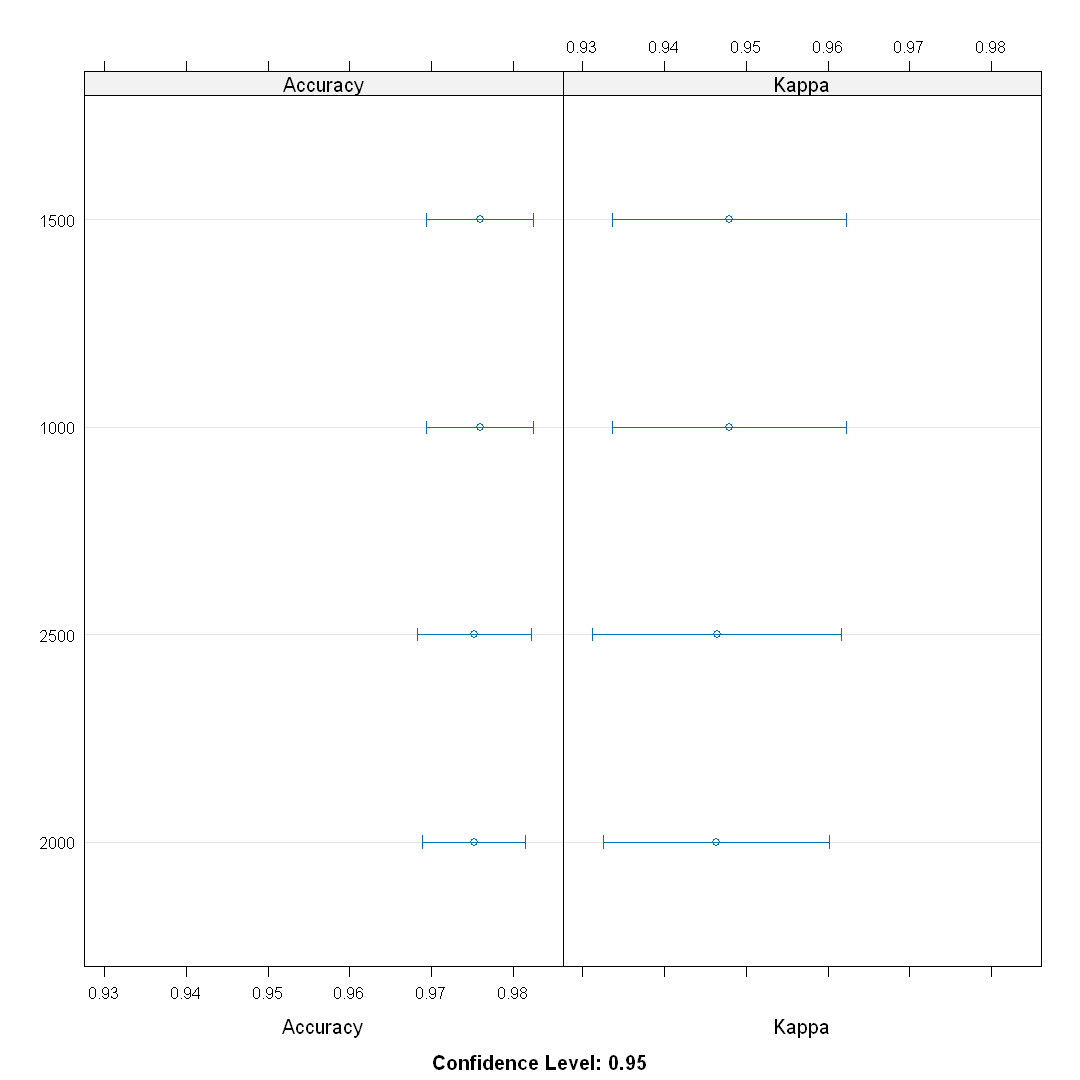

In [269]:
dotplot(results)

#### Our model have highest accuracy at ntree = 1000/1500 when accuracy =97.82%. It mean that we should keep ntree between 1000 and 1500 is best adapted values for tunning. 

#### Reference:

    https://www.r-bloggers.com/2017/01/feature-selection-in-machine-learning-breast-cancer-datasets/
    https://www.r-bloggers.com/2018/06/code-for-workshop-introduction-to-machine-learning-with-r/
    https://rpubs.com/jazzmine/breast-cancer-ml
    https://rpubs.com/raviolli77/352956